<a href="https://colab.research.google.com/github/rrstats/Coursework-Foundations-of-Data-Science-/blob/main/L32_Residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [ ]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)


In [ ]:
## 2016 election dataset

In [ ]:
demographics = Table.read_table('district_demographics2016.csv')
demographics

FileNotFoundError: ignored

In [ ]:
predict_voting = demographics.select('Median Income', 'Percent voting for Clinton')
predict_voting = predict_voting.with_columns(
    'Fitted', 
    fitted_values(demographics, 'Median Income', 'Percent voting for Clinton')
)

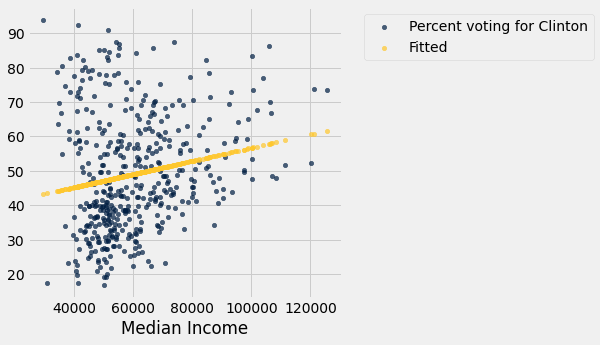

In [ ]:
predict_voting.scatter('Median Income')

## NOT AN ELLIPSE
## ECOLOGICAL CORRELATION

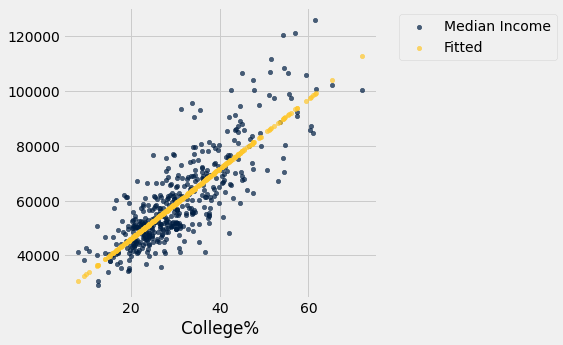

In [ ]:
predict_income = demographics.select('College%', 
                                     'Median Income') 

predict_income = predict_income.with_columns(
    'Fitted', 
    fitted_values(demographics, 'College%', 'Median Income')
)
predict_income.scatter('College%')

In [ ]:
#Let's visualize the errors


In [ ]:
demographics_errors(regression_slope, regression_intercept)

NameError: ignored